# Simulating Eclipse/DATA input files
The DATA format is commonly used in reservoir simulation. JutulDarcy can set
up cases on this format and includes a fully featured grid builder for
corner-point grids. Once a case has been set up, it uses the same types as a
regular JutulDarcy simulation, allowing modification and use of the case in
differentiable workflows.

We begin by loading the SPE9 dataset via the GeoEnergyIO package.

In [1]:
using JutulDarcy
pth = JutulDarcy.GeoEnergyIO.test_input_file_path("SPE9", "SPE9.DATA")

"/home/runner/.julia/artifacts/c1063fdc96b21cbc18ea8a3bd1a1281aa04ffa3f/SPE9.DATA"

## Set up and run a simulation
If we do not need the case, we could also have done:
ws, states = simulate_data_file(pth)

In [2]:
case = setup_case_from_data_file(pth)
ws, states = simulate_reservoir(case)

PVT: Fixing table for low pressure conditions.
Simulating 2 years, 24.22 weeks as 90 report steps   2%| |  ETA: 0:02:21
  Progress:  Solving step 2/90 (2.22% of time interval complete)


Simulating 2 years, 24.22 weeks as 90 report steps   3%| |  ETA: 0:01:38
  Progress:  Solving step 3/90 (3.33% of time interval complete)


Simulating 2 years, 24.22 weeks as 90 report steps   4%| |  ETA: 0:01:15
  Progress:  Solving step 4/90 (4.44% of time interval complete)


Simulating 2 years, 24.22 weeks as 90 report steps   5%| |  ETA: 0:01:01
  Progress:  Solving step 5/90 (5.56% of time interval complete)


Simulating 2 years, 24.22 weeks as 90 report steps   8%|▏|  ETA: 0:00:45
  Progress:  Solving step 7/90 (7.78% of time interval complete)


Simulating 2 years, 24.22 weeks as 90 report steps   9%|▏|  ETA: 0:00:40
  Progress:  Solving step 8/90 (8.89% of time interval complete)


Simulating 2 years, 24.22 weeks as 90 report steps  11%|▏|  ETA: 0:00:33
  Progress:  Solving step 10/90 (11.11% 

ReservoirSimResult with 90 entries:

  wells (26 present):
    :INJE1
    :PRODU25
    :PRODU16
    :PRODU20
    :PRODU10
    :PRODU12
    :PRODU22
    :PRODU14
    :PRODU6
    :PRODU7
    :PRODU9
    :PRODU24
    :PRODU3
    :PRODU23
    :PRODU5
    :PRODU11
    :PRODU17
    :PRODU4
    :PRODU15
    :PRODU2
    :PRODU19
    :PRODU21
    :PRODU13
    :PRODU8
    :PRODU26
    :PRODU18
    Results per well:
       :wrat => Vector{Float64} of size (90,)
       :Aqueous_mass_rate => Vector{Float64} of size (90,)
       :orat => Vector{Float64} of size (90,)
       :bhp => Vector{Float64} of size (90,)
       :lrat => Vector{Float64} of size (90,)
       :mass_rate => Vector{Float64} of size (90,)
       :rate => Vector{Float64} of size (90,)
       :Vapor_mass_rate => Vector{Float64} of size (90,)
       :control => Vector{Symbol} of size (90,)
       :Liquid_mass_rate => Vector{Float64} of size (90,)
       :grat => Vector{Float64} of size (90,)

  states (Vector with 90 entries, reservoi

## Show the input data
The input data takes the form of a Dict:

In [3]:
case.input_data

Dict{String, Any} with 6 entries:
  "RUNSPEC"  => OrderedDict{String, Any}("TITLE"=>"SPE 9", "DIMENS"=>[24, 25, 1…
  "GRID"     => OrderedDict{String, Any}("cartDims"=>(24, 25, 15), "CURRENT_BOX…
  "PROPS"    => OrderedDict{String, Any}("PVTW"=>Any[[2.48211e7, 1.0034, 4.3511…
  "SUMMARY"  => OrderedDict{String, Any}()
  "SCHEDULE" => Dict{String, Any}("STEPS"=>OrderedDict{String, Any}[OrderedDict…
  "SOLUTION" => OrderedDict{String, Any}("EQUIL"=>Any[[2753.87, 2.48211e7, 3032…

We can also examine the RUNSPEC section

In [4]:
case.input_data["RUNSPEC"]

OrderedCollections.OrderedDict{String, Any} with 13 entries:
  "TITLE"    => "SPE 9"
  "DIMENS"   => [24, 25, 15]
  "OIL"      => true
  "WATER"    => true
  "GAS"      => true
  "DISGAS"   => true
  "FIELD"    => true
  "START"    => DateTime("2015-01-01T00:00:00")
  "WELLDIMS" => [26, 5, 1, 26, 5, 10, 5, 4, 3, 0, 1, 1, 10, 201]
  "TABDIMS"  => [1, 1, 40, 20, 1, 20, 20, 1, 1, -1  …  -1, 10, 10, 10, -1, 5, 5…
  "EQLDIMS"  => [1, 100, 50, 1, 50]
  "UNIFIN"   => true
  "UNIFOUT"  => true

## Plot the simulation model
These plot are interactive when run outside of the documentations.

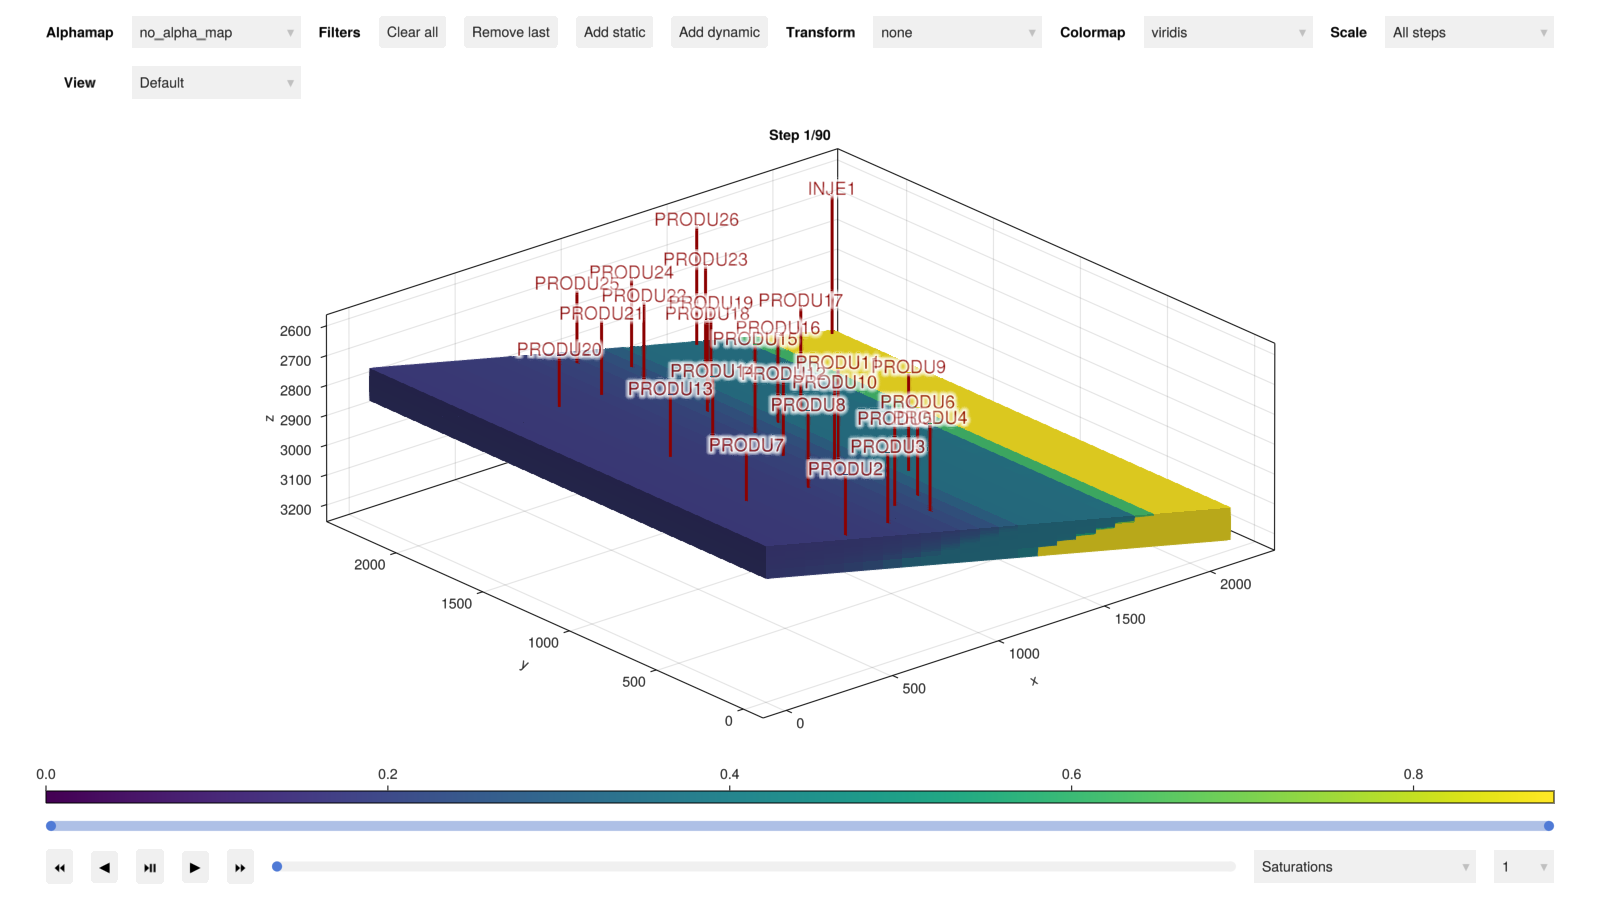

In [5]:
using GLMakie
plot_reservoir(case.model, states)

## Plot the well responses

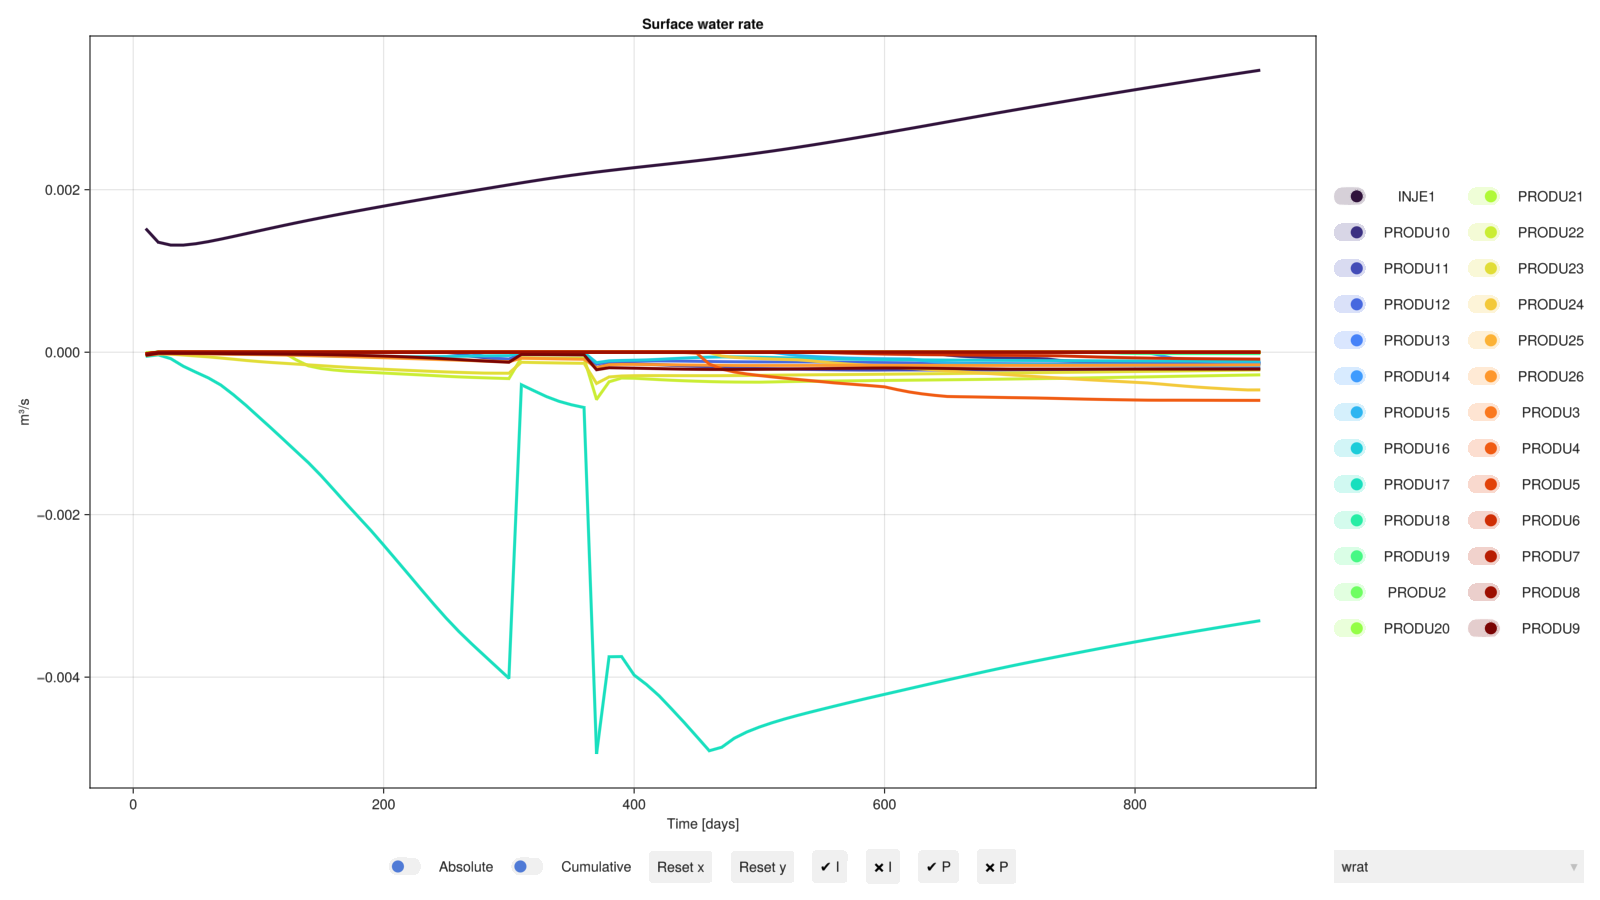

In [6]:
plot_well_results(ws)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*